In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [101]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import metrics

In [102]:
!pip install scikit-plot
import scikitplot as skplt

In [103]:
data = pd.read_csv("heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [104]:
x = data.drop(['target'], axis = 1)
y = data.target

In [105]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [106]:
data.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','ca':'Major_vessels',
                   'thal':'Thalassemia_types','target':'Heart_attack','slope':'ST_slope'}, inplace = True)

In [107]:
Table= data.groupby(['Sex','Maximum_heart_rate'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
Table.head(10).style.background_gradient(cmap='Purples')

,Sex,Maximum_heart_rate,Heart_attack
86,1,144,7
77,1,132,7
103,1,162,7
113,1,173,7
82,1,140,6
42,0,172,6
91,1,150,6
70,1,125,6
97,1,156,6
34,0,163,5


In [108]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 5)

In [109]:
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.LinearSVC()
clf.fit(X, y)
LinearSVC()

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

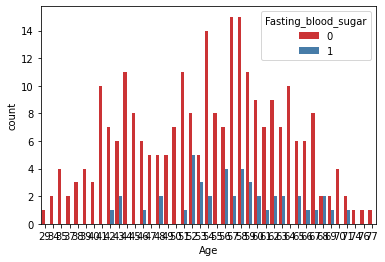

In [110]:
sns.countplot(x = 'Age',hue = 'Fasting_blood_sugar', data = data,palette="Set1")

In [111]:
model3 = LinearSVC()
model3.fit(x_train,y_train)
accuracy3 = model3.score(x_test,y_test)
accuracy.append(accuracy3)
print('SVM Classifier Accuracy -->',((accuracy3)*100))

SVM Classifier Accuracy --> 91.80327868852459


In [112]:
accuracy=[]

In [113]:
model3 = LinearSVC(C = 15,loss = 'hinge',penalty = 'l2')
model3.fit(x_train,y_train)
accuracy3 = model3.score(x_test,y_test)
accuracy.append(accuracy3)
print('SVM Classifier Accuracy -->',((accuracy3)*100))
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter('ignore')

SVM Classifier Accuracy --> 83.60655737704919


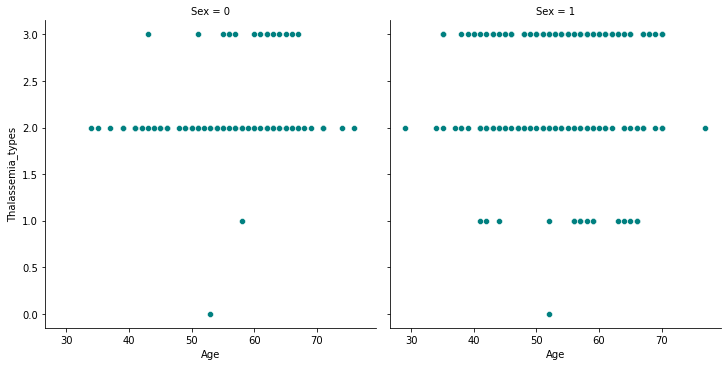

In [114]:
sns.relplot(x ='Age', y ='Thalassemia_types', col = 'Sex', data = data, color = 'teal')

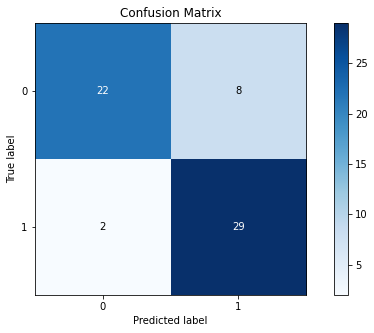

In [115]:
P = model3.predict(x_test)
matrix3 = (y_test,P)
skplt.metrics.plot_confusion_matrix(y_test ,P ,figsize=(10,5))